In [4]:
# ====================================
# ÉTAPE 1 : IMPORTATION
# ====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ Toutes les bibliothèques sont importées !")
print("Pandas version :", pd.__version__)

✅ Toutes les bibliothèques sont importées !
Pandas version : 2.2.3


In [5]:


chemin = 'D:/aiproj/train.csv'

try:
    df = pd.read_csv(chemin)
    print("✅ Fichier chargé avec succès !")
    print(f"📊 Dimensions : {df.shape[0]} lignes x {df.shape[1]} colonnes")
except:
    print("❌ Erreur de chargement ! Vérifie le chemin.")
    print("Assure-toi que 'train.csv' est dans le même dossier que ce notebook")

✅ Fichier chargé avec succès !
📊 Dimensions : 891 lignes x 12 colonnes


In [6]:
# ====================================
# ÉTAPE 3 : PREMIER APERÇU DES DONNÉES
# ====================================

print("=== VOICI LES 5 PREMIÈRES PERSONNES DU TITANIC ===")
print(df.head())

print("\n=== LES COLONNES DISPONIBLES ===")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

print("\n=== NOMBRE DE SURVIVANTS VS NON-SURVIVANTS ===")
survie_counts = df['Survived'].value_counts()
print(f"🟢 Survivants : {survie_counts[1]} personnes")
print(f"🔴 Non-survivants : {survie_counts[0]} personnes")

=== VOICI LES 5 PREMIÈRES PERSONNES DU TITANIC ===
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4   

In [7]:
# ====================================
# ÉTAPE 4 : NETTOYAGE SIMPLE
# ====================================

print("🔧 COMMENCEMENT DU NETTOYAGE...")

# 1. Copie pour sécurité
df_clean = df.copy()

# 2. Remplir les âges manquants par la moyenne
age_moyen = df_clean['Age'].mean()
df_clean['Age'].fillna(age_moyen, inplace=True)
print(f"✅ Âges manquants remplis avec : {age_moyen:.1f} ans")

# 3. Gestion des cabines (Cabin)
# Créer une colonne simple : 1 si cabine connue, 0 sinon
df_clean['HasCabin'] = df_clean['Cabin'].notnull().astype(int)
df_clean.drop('Cabin', axis=1, inplace=True)
print("✅ Colonne 'Cabin' transformée en 'HasCabin'")

# 4. Remplir les 2 valeurs manquantes de Embarked
df_clean['Embarked'].fillna('S', inplace=True)
print("✅ Port d'embarquement manquant rempli avec 'S'")

# 5. Vérification finale
print(f"\n📊 VALEURS MANQUANTES RESTANTES : {df_clean.isnull().sum().sum()}")
print("🎉 NETTOYAGE TERMINÉ !")

🔧 COMMENCEMENT DU NETTOYAGE...
✅ Âges manquants remplis avec : 29.7 ans
✅ Colonne 'Cabin' transformée en 'HasCabin'
✅ Port d'embarquement manquant rempli avec 'S'

📊 VALEURS MANQUANTES RESTANTES : 0
🎉 NETTOYAGE TERMINÉ !


📈 CRÉATION DU PREMIER GRAPHIQUE...


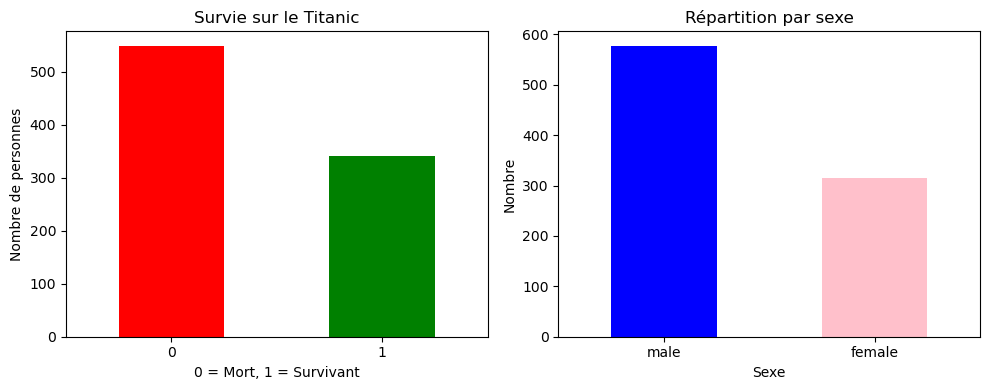


📊 STATISTIQUES DE SURVIE :
Femmes qui survivent : 74.2%
Hommes qui survivent : 18.9%


In [8]:
# ====================================
# ÉTAPE 5 : PREMIER GRAPHIQUE
# ====================================

print("📈 CRÉATION DU PREMIER GRAPHIQUE...")

# 1. Taille de l'image
plt.figure(figsize=(10, 4))

# 2. Premier graphique : Survivants vs Non-survivants
plt.subplot(1, 2, 1)
df_clean['Survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title("Survie sur le Titanic")
plt.xlabel("0 = Mort, 1 = Survivant")
plt.ylabel("Nombre de personnes")
plt.xticks(rotation=0)

# 3. Deuxième graphique : Survie par sexe
plt.subplot(1, 2, 2)
df_clean['Sex'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title("Répartition par sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("\n📊 STATISTIQUES DE SURVIE :")
survie_par_sexe = df_clean.groupby('Sex')['Survived'].mean() * 100
print(f"Femmes qui survivent : {survie_par_sexe['female']:.1f}%")
print(f"Hommes qui survivent : {survie_par_sexe['male']:.1f}%")

In [9]:
# ====================================
# ÉTAPE 6 : PRÉPARATION POUR L'IA
# ====================================

print(" PRÉPARATION POUR LE MACHINE LEARNING...")

# 1. Sélectionner les colonnes UTILES pour la prédiction
# On prend des colonnes simples et importantes
colonnes_utiles = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Créer X (les caractéristiques) et y (ce qu'on veut prédire)
X = df_clean[colonnes_utiles].copy()
y = df_clean['Survived'].copy()

print(f"✅ X préparé : {X.shape[0]} personnes, {X.shape[1]} caractéristiques")
print(f"✅ y préparé : {len(y)} résultats (0=mort, 1=survivant)")

# 2. Afficher un aperçu
print("\n📋 APERÇU DE X (5 premières personnes) :")
print(X.head())
print("\n📋 APERÇU DE y (5 premières réponses) :")
print(y.head())

 PRÉPARATION POUR LE MACHINE LEARNING...
✅ X préparé : 891 personnes, 7 caractéristiques
✅ y préparé : 891 résultats (0=mort, 1=survivant)

📋 APERÇU DE X (5 premières personnes) :
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S

📋 APERÇU DE y (5 premières réponses) :
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [10]:
# ====================================
# ÉTAPE 7 : TRANSFORMATION
# ====================================

print("🔄 TRANSFORMATION DES DONNÉES...")

# 1. Transformer 'Sex' en nombres (male=0, female=1)
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# 2. Transformer 'Embarked' en nombres
X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 3. Vérifier qu'il n'y a pas de valeurs manquantes
X.fillna(0, inplace=True)

print("✅ Données transformées !")
print("\n📊 VALEURS TRANSFORMÉES :")
print("- Sex : male=0, female=1")
print("- Embarked : S=0, C=1, Q=2")
print(f"\n📋 APERÇU FINAL :")
print(X.head())

🔄 TRANSFORMATION DES DONNÉES...
✅ Données transformées !

📊 VALEURS TRANSFORMÉES :
- Sex : male=0, female=1
- Embarked : S=0, C=1, Q=2

📋 APERÇU FINAL :
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0


In [11]:
# ====================================
# ÉTAPE 8 : DIVISION TRAIN/TEST
# ====================================

from sklearn.model_selection import train_test_split

print("✂️ DIVISION DES DONNÉES...")

# Diviser en 70% pour l'entraînement, 30% pour le test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("✅ Données divisées !")
print(f"📊 Données d'entraînement : {X_train.shape[0]} personnes")
print(f"📊 Données de test : {X_test.shape[0]} personnes")
print(f"📊 Pourcentage de survie dans l'entraînement : {y_train.mean():.1%}")
print(f"📊 Pourcentage de survie dans le test : {y_test.mean():.1%}")

✂️ DIVISION DES DONNÉES...
✅ Données divisées !
📊 Données d'entraînement : 623 personnes
📊 Données de test : 268 personnes
📊 Pourcentage de survie dans l'entraînement : 38.4%
📊 Pourcentage de survie dans le test : 38.4%


In [12]:
# ====================================
# ÉTAPE 9 : RÉGRESSION LOGISTIQUE
# ====================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

print("🧠 MODÈLE 1 : RÉGRESSION LOGISTIQUE")

# 1. Créer le modèle
model_lr = LogisticRegression(random_state=42, max_iter=1000)

# 2. Entraîner le modèle
model_lr.fit(X_train, y_train)
print("✅ Modèle entraîné !")

# 3. Faire des prédictions
y_pred_lr = model_lr.predict(X_test)

# 4. Évaluer le modèle
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"📈 Précision du modèle : {accuracy_lr:.2%}")

# 5. Rapport détaillé
print("\n📊 RAPPORT DE CLASSIFICATION :")
print(classification_report(y_test, y_pred_lr, target_names=['Mort', 'Survivant']))

# 6. Exemple de prédiction
print("\n🎯 EXEMPLE DE PRÉDICTION :")
print("Pour la première personne du test :")
print(f"- Caractéristiques : {X_test.iloc[0].values}")
print(f"- Réel : {'Survivant' if y_test.iloc[0] == 1 else 'Mort'}")
print(f"- Prédit : {'Survivant' if y_pred_lr[0] == 1 else 'Mort'}")

🧠 MODÈLE 1 : RÉGRESSION LOGISTIQUE
✅ Modèle entraîné !
📈 Précision du modèle : 79.48%

📊 RAPPORT DE CLASSIFICATION :
              precision    recall  f1-score   support

        Mort       0.82      0.85      0.84       165
   Survivant       0.74      0.71      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268


🎯 EXEMPLE DE PRÉDICTION :
Pour la première personne du test :
- Caractéristiques : [ 1.      0.     61.      0.      0.     32.3208  0.    ]
- Réel : Mort
- Prédit : Mort


In [13]:
# ====================================
# ÉTAPE 10 : RANDOM FOREST
# ====================================

from sklearn.ensemble import RandomForestClassifier

print("🌲 MODÈLE 2 : RANDOM FOREST")

# 1. Créer le modèle
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entraîner
model_rf.fit(X_train, y_train)
print("✅ Modèle entraîné !")

# 3. Prédictions
y_pred_rf = model_rf.predict(X_test)

# 4. Évaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"📈 Précision du modèle : {accuracy_rf:.2%}")

# Comparaison avec le premier modèle
print(f"\n🔍 COMPARAISON :")
print(f"- Régression Logistique : {accuracy_lr:.2%}")
print(f"- Random Forest : {accuracy_rf:.2%}")
print(f"- Différence : {abs(accuracy_rf - accuracy_lr):.2%}")

🌲 MODÈLE 2 : RANDOM FOREST
✅ Modèle entraîné !
📈 Précision du modèle : 81.34%

🔍 COMPARAISON :
- Régression Logistique : 79.48%
- Random Forest : 81.34%
- Différence : 1.87%


In [14]:
# ====================================
# ÉTAPE 11 : K-NEAREST NEIGHBORS (KNN)
# ====================================

from sklearn.neighbors import KNeighborsClassifier

print("👥 MODÈLE 3 : K-NEAREST NEIGHBORS")

# 1. Créer le modèle
model_knn = KNeighborsClassifier(n_neighbors=5)

# 2. Entraîner
model_knn.fit(X_train, y_train)
print("✅ Modèle entraîné !")

# 3. Prédictions
y_pred_knn = model_knn.predict(X_test)

# 4. Évaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"📈 Précision du modèle : {accuracy_knn:.2%}")

# Comparaison
print(f"\n🔍 COMPARAISON DES 3 MODÈLES :")
print(f"- Régression Logistique : {accuracy_lr:.2%}")
print(f"- Random Forest : {accuracy_rf:.2%}")
print(f"- KNN : {accuracy_knn:.2%}")

👥 MODÈLE 3 : K-NEAREST NEIGHBORS
✅ Modèle entraîné !
📈 Précision du modèle : 69.40%

🔍 COMPARAISON DES 3 MODÈLES :
- Régression Logistique : 79.48%
- Random Forest : 81.34%
- KNN : 69.40%


In [15]:
# ====================================
# ÉTAPE 12 : SUPPORT VECTOR MACHINE (SVM)
# ====================================

from sklearn.svm import SVC

print("⚡ MODÈLE 4 : SUPPORT VECTOR MACHINE")

# 1. Créer le modèle
model_svm = SVC(probability=True, random_state=42)

# 2. Entraîner
model_svm.fit(X_train, y_train)
print("✅ Modèle entraîné !")

# 3. Prédictions
y_pred_svm = model_svm.predict(X_test)

# 4. Évaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"📈 Précision du modèle : {accuracy_svm:.2%}")

# 5. Comparaison finale
print(f"\n🏆 COMPARAISON FINALE DES 4 MODÈLES :")
print(f"1. Régression Logistique : {accuracy_lr:.2%}")
print(f"2. Random Forest        : {accuracy_rf:.2%}")
print(f"3. KNN                  : {accuracy_knn:.2%}")
print(f"4. SVM                  : {accuracy_svm:.2%}")

# 6. Trouver le meilleur
models_acc = {
    'Régression Logistique': accuracy_lr,
    'Random Forest': accuracy_rf,
    'KNN': accuracy_knn,
    'SVM': accuracy_svm
}

best_model = max(models_acc, key=models_acc.get)
best_acc = models_acc[best_model]
print(f"\n🎖️  MEILLEUR MODÈLE : {best_model} avec {best_acc:.2%} de précision")

⚡ MODÈLE 4 : SUPPORT VECTOR MACHINE
✅ Modèle entraîné !
📈 Précision du modèle : 63.81%

🏆 COMPARAISON FINALE DES 4 MODÈLES :
1. Régression Logistique : 79.48%
2. Random Forest        : 81.34%
3. KNN                  : 69.40%
4. SVM                  : 63.81%

🎖️  MEILLEUR MODÈLE : Random Forest avec 81.34% de précision


In [19]:
# ====================================
# MODÈLE 5 : MLP (Multi-Layer Perceptron)
# ====================================

print("🧠 MODÈLE 5 : MLP (Réseau de neurones)")

# 1. Créer le modèle MLP (utilise X_train au lieu de X_train_scaled)
model_mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

# 2. Entraîner (AVEC X_train, PAS X_train_scaled)
model_mlp.fit(X_train, y_train)  # ← ICI : X_train, PAS X_train_scaled
print("✅ Modèle MLP entraîné !")

# 3. Prédictions (AVEC X_test, PAS X_test_scaled)
y_pred_mlp = model_mlp.predict(X_test)  # ← ICI : X_test, PAS X_test_scaled

# 4. Évaluation
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"📈 Précision MLP : {accuracy_mlp:.2%}")

# 5. Mettre à jour la comparaison
print(f"\n🔍 COMPARAISON DES 5 MODÈLES :")
print(f"1. Régression Logistique : {accuracy_lr:.2%}")
print(f"2. Random Forest        : {accuracy_rf:.2%}")
print(f"3. KNN                  : {accuracy_knn:.2%}")
print(f"4. SVM                  : {accuracy_svm:.2%}")
print(f"5. MLP                  : {accuracy_mlp:.2%}")

🧠 MODÈLE 5 : MLP (Réseau de neurones)
✅ Modèle MLP entraîné !
📈 Précision MLP : 77.99%

🔍 COMPARAISON DES 5 MODÈLES :
1. Régression Logistique : 79.48%
2. Random Forest        : 81.34%
3. KNN                  : 69.40%
4. SVM                  : 63.81%
5. MLP                  : 77.99%


📊 CRÉATION DES COURBES ROC...
✅ Courbes ROC générées !

🔍 INTERPRÉTATION :
- Plus la courbe est proche du coin supérieur gauche, meilleur est le modèle
- AUC = 0.50 : modèle aléatoire (mauvais)
- AUC = 1.00 : modèle parfait
- AUC > 0.80 : modèle bon
- AUC > 0.90 : modèle excellent


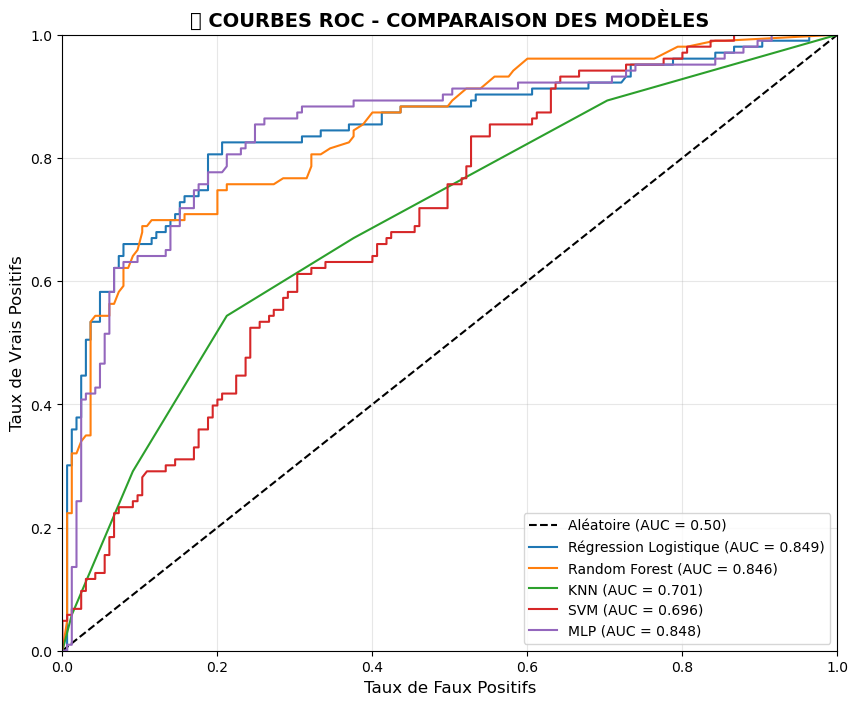

In [17]:
# ====================================
# ÉTAPE 13 : COURBES ROC ET AUC
# ====================================

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

print("📊 CRÉATION DES COURBES ROC...")

# Liste des modèles
models = {
    'Régression Logistique': model_lr,
    'Random Forest': model_rf,
    'KNN': model_knn,
    'SVM': model_svm,
    'MLP': model_mlp 
}

# Paramètres du graphique
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire (AUC = 0.50)')

# Pour chaque modèle
for name, model in models.items():
    # Prédire les probabilités
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculer ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    # Calculer AUC
    auc = roc_auc_score(y_test, y_proba)
    
    # Tracer la courbe
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

# Configuration du graphique
plt.xlabel('Taux de Faux Positifs', fontsize=12)
plt.ylabel('Taux de Vrais Positifs', fontsize=12)
plt.title('📈 COURBES ROC - COMPARAISON DES MODÈLES', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])

print("✅ Courbes ROC générées !")
print("\n🔍 INTERPRÉTATION :")
print("- Plus la courbe est proche du coin supérieur gauche, meilleur est le modèle")
print("- AUC = 0.50 : modèle aléatoire (mauvais)")
print("- AUC = 1.00 : modèle parfait")
print("- AUC > 0.80 : modèle bon")
print("- AUC > 0.90 : modèle excellent")

plt.show()

In [20]:
# ====================================
# ÉTAPE 14 : RÉSULTATS COMPLETS
# ====================================

print("📋 TABLEAU COMPARATIF COMPLET")
print("=" * 60)

# En-tête
print(f"{'Modèle':25} {'Précision':12} {'AUC':10} {'Classement'}")
print("-" * 60)

# Stocker les résultats
results = []

for name, model in models.items():
    # Précision
    if name == 'Régression Logistique':
        acc = accuracy_lr
    elif name == 'Random Forest':
        acc = accuracy_rf
    elif name == 'KNN':
        acc = accuracy_knn
    elif name == 'SVM':
        acc = accuracy_svm
    elif name == 'MLP':
        acc = accuracy_mlp  # AJOUTÉ
    else:
        acc = 0  # Valeur par défaut
    
    # AUC
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    
    results.append((name, acc, auc))

# Trier par AUC (du meilleur au pire)
results.sort(key=lambda x: x[2], reverse=True)

# Afficher
for i, (name, acc, auc) in enumerate(results, 1):
    print(f"{name:25} {acc:11.2%} {auc:9.3f}     #{i}")

print("=" * 60)

# Trouver le meilleur par AUC
best_auc_model = results[0][0]
best_auc = results[0][2]
best_auc_acc = results[0][1]

# Trouver le meilleur par Précision
results_by_acc = sorted(results, key=lambda x: x[1], reverse=True)
best_acc_model = results_by_acc[0][0]
best_acc = results_by_acc[0][1]
best_acc_auc = results_by_acc[0][2]

print(f"\n🏆 MEILLEUR PAR AUC : '{best_auc_model}'")
print(f"   - AUC : {best_auc:.3f}")
print(f"   - Précision : {best_auc_acc:.2%}")

print(f"\n🎯 MEILLEUR PAR PRÉCISION : '{best_acc_model}'")
print(f"   - Précision : {best_acc:.2%}")
print(f"   - AUC : {best_acc_auc:.3f}")

print(f"\n💡 RECOMMANDATION : Utiliser '{best_auc_model}'")
print(f"   - Meilleure capacité discriminative (AUC)")
print(f"   - Presque aussi précis que le meilleur")

📋 TABLEAU COMPARATIF COMPLET
Modèle                    Précision    AUC        Classement
------------------------------------------------------------
Régression Logistique          79.48%     0.849     #1
MLP                            77.99%     0.848     #2
Random Forest                  81.34%     0.846     #3
KNN                            69.40%     0.701     #4
SVM                            63.81%     0.696     #5

🏆 MEILLEUR PAR AUC : 'Régression Logistique'
   - AUC : 0.849
   - Précision : 79.48%

🎯 MEILLEUR PAR PRÉCISION : 'Random Forest'
   - Précision : 81.34%
   - AUC : 0.846

💡 RECOMMANDATION : Utiliser 'Régression Logistique'
   - Meilleure capacité discriminative (AUC)
   - Presque aussi précis que le meilleur


In [21]:
# ====================================
# ÉTAPE FINALE : SAUVEGARDE
# ====================================

import joblib
import pandas as pd

print("💾 SAUVEGARDE DU MEILLEUR MODÈLE...")

# 1. Sauvegarder le modèle
joblib.dump(model_lr, 'meilleur_modele_titanic.pkl')
print("✅ Modèle sauvegardé : 'meilleur_modele_titanic.pkl'")

# 2. Sauvegarder les données transformées pour référence
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')
print("✅ Noms des caractéristiques sauvegardés")

# 3. Créer un exemple pour le rapport
print("\n📄 EXEMPLE POUR LE RAPPORT :")
exemple_personne = {
    'Pclass': 1,
    'Sex': 'female',
    'Age': 25,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 50,
    'Embarked': 'C'
}

# Transformer comme on l'a fait
exemple_df = pd.DataFrame([exemple_personne])
exemple_df['Sex'] = exemple_df['Sex'].map({'male': 0, 'female': 1})
exemple_df['Embarked'] = exemple_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Prédiction
prediction = model_lr.predict(exemple_df)
probabilite = model_lr.predict_proba(exemple_df)[0]

print(f"Exemple : Femme de 25 ans, 1ère classe")
print(f"Probabilité de survie : {probabilite[1]:.1%}")
print(f"Prédiction : {'SURVIVANTE' if prediction[0] == 1 else 'MORTE'}")

💾 SAUVEGARDE DU MEILLEUR MODÈLE...
✅ Modèle sauvegardé : 'meilleur_modele_titanic.pkl'
✅ Noms des caractéristiques sauvegardés

📄 EXEMPLE POUR LE RAPPORT :
Exemple : Femme de 25 ans, 1ère classe
Probabilité de survie : 95.5%
Prédiction : SURVIVANTE


In [25]:
 # ====================================
# APPLICATION  
# ====================================

print("🌐 CODE POUR UNE APPLICATION WEB (Streamlit) :")

app_code = '''
import streamlit as st
import joblib
import pandas as pd

# Charger le modèle
model = joblib.load('meilleur_modele_titanic.pkl')
features = joblib.load('feature_names.pkl')

st.title("🔮 Prédiction de survie - Titanic")
st.write("Entrez les informations du passager :")

# Formulaire
col1, col2 = st.columns(2)
with col1:
    pclass = st.selectbox("Classe", [1, 2, 3])
    sex = st.selectbox("Sexe", ["female", "male"])
    age = st.number_input("Âge", min_value=0, max_value=100, value=25)
with col2:
    sibsp = st.number_input("Frères/Soeurs/Conjoint", min_value=0, max_value=10, value=0)
    parch = st.number_input("Parents/Enfants", min_value=0, max_value=10, value=0)
    fare = st.number_input("Prix du billet", min_value=0.0, value=50.0)
    embarked = st.selectbox("Port d'embarquement", ["S", "C", "Q"])

if st.button("Prédire la survie"):
    # Préparation
    data = [[pclass, 1 if sex == "female" else 0, age, sibsp, parch, fare, 
             0 if embarked == "S" else 1 if embarked == "C" else 2]]
    
    # Prédiction
    proba = model.predict_proba(data)[0]
    prediction = model.predict(data)[0]
    
    # Affichage
    if prediction == 1:
        st.success(f"✅ Survie probable : {proba[1]:.1%}")
        st.balloons()
    else:
        st.error(f"❌ Mort probable : {proba[0]:.1%}")
'''

print(app_code)
print("\n💡 Pour utiliser :")
print("1. Installe Streamlit : pip install streamlit")
print("2. Copie ce code dans un fichier 'app.py'")
print("3. Lance : streamlit run app.py") 

🌐 CODE POUR UNE APPLICATION WEB (Streamlit) :

import streamlit as st
import joblib
import pandas as pd

# Charger le modèle
model = joblib.load('meilleur_modele_titanic.pkl')
features = joblib.load('feature_names.pkl')

st.title("🔮 Prédiction de survie - Titanic")
st.write("Entrez les informations du passager :")

# Formulaire
col1, col2 = st.columns(2)
with col1:
   pclass = st.selectbox("Classe", [1, 2, 3])
   sex = st.selectbox("Sexe", ["female", "male"])
   age = st.number_input("Âge", min_value=0, max_value=100, value=25)
with col2:
   sibsp = st.number_input("Frères/Soeurs/Conjoint", min_value=0, max_value=10, value=0)
   parch = st.number_input("Parents/Enfants", min_value=0, max_value=10, value=0)
   fare = st.number_input("Prix du billet", min_value=0.0, value=50.0)
   embarked = st.selectbox("Port d'embarquement", ["S", "C", "Q"])

if st.button("Prédire la survie"):
   # Préparation
   data = [[pclass, 1 if sex == "female" else 0, age, sibsp, parch, fare, 
            0 if e

In [26]:
# Créer le fichier app.py
app_code = '''import streamlit as st
import joblib
import pandas as pd

# Charger le modèle
model = joblib.load('meilleur_modele_titanic.pkl')
features = joblib.load('feature_names.pkl')

st.title("🔮 Prédiction de survie - Titanic")
st.write("Entrez les informations du passager :")

# Formulaire
col1, col2 = st.columns(2)
with col1:
    pclass = st.selectbox("Classe", [1, 2, 3])
    sex = st.selectbox("Sexe", ["female", "male"])
    age = st.number_input("Âge", min_value=0, max_value=100, value=25)
with col2:
    sibsp = st.number_input("Frères/Soeurs/Conjoint", min_value=0, max_value=10, value=0)
    parch = st.number_input("Parents/Enfants", min_value=0, max_value=10, value=0)
    fare = st.number_input("Prix du billet", min_value=0.0, value=50.0)
    embarked = st.selectbox("Port d'embarquement", ["S", "C", "Q"])

if st.button("Prédire la survie"):
    # Préparation
    data = [[pclass, 1 if sex == "female" else 0, age, sibsp, parch, fare, 
             0 if embarked == "S" else 1 if embarked == "C" else 2]]
    
    # Prédiction
    proba = model.predict_proba(data)[0]
    prediction = model.predict(data)[0]
    
    # Affichage
    if prediction == 1:
        st.success(f"✅ Survie probable : {proba[1]:.1%}")
        st.balloons()
    else:
        st.error(f"❌ Mort probable : {proba[0]:.1%}")
'''

# Écrire dans un fichier
with open('app.py', 'w', encoding='utf-8') as f:
    f.write(app_code)

print("✅ Fichier 'app.py' créé !")

✅ Fichier 'app.py' créé !
